# Pydy Tuesday 17-06-2025 - API Specs Data

### 1. Import Libraries

In [84]:
import sys
import pydytuesday
import pandas as pd

# For Data Visualisation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
print("Python:", sys.version)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)

Python: 3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]
pandas: 2.3.0
matplotlib: 3.6.2
seaborn: 0.13.2


### 2. Load Data from the official pydytuesday repo

In [2]:
# Use date to fetch the files for that week
pydytuesday.get_date('2025-06-17')

Trying to fetch README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-17/readme.md
Successfully fetched README from: https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-06-17/readme.md
Successfully saved api_categories.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\api_categories.csv
Successfully saved api_info.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\api_info.csv
Successfully saved api_logos.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\api_logos.csv
Successfully saved api_origins.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\api_origins.csv
Successfully saved apisguru.png to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\apisguru.png
Successfully saved apisguru_apis.csv to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\apisguru_apis.csv
Successfully saved meta.yaml to d:\SAUVIK\Projects\Pydy_Tuesdays\Pydy_17062025\meta.yaml


In [25]:
# Load datasets using Pandas 
api_categories = pd.read_csv('api_categories.csv')
api_info = pd.read_csv('api_info.csv')
api_logos = pd.read_csv('api_logos.csv')
api_origins = pd.read_csv('api_origins.csv')
apisguru_apis = pd.read_csv('apisguru_apis.csv')

# Store all the files in a dictionary
datafiles = {
    "api_categories": api_categories,
    "api_info": api_info,
    "api_logos": api_logos,
    "api_origins": api_origins,
    "apisguru_apis": apisguru_apis
}

# Print info for all the files
for filename, df in datafiles.items():
    print(f" {filename} Info: \n")
    print(df.info())
    print("\n" + "-"*60 + "\n")


 api_categories Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               2783 non-null   object
 1   apisguru_category  2783 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB
None

------------------------------------------------------------

 api_info Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2529 entries, 0 to 2528
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              2529 non-null   object
 1   contact_name      1025 non-null   object
 2   contact_url       971 non-null    object
 3   description       2224 non-null   object
 4   title             2517 non-null   object
 5   provider_name     2529 non-null   object
 6   service_name      1994 non-null   object
 7   license_name      886 non-nul

### 3.a. Merge Data to form a unified dataframe

In [26]:
# Merge the required files - depends on which areas to explore
# For now, I decided not to use the api_logos file so I'm not merging that.

df = api_categories.merge(api_info, on='name', how='outer')\
                   .merge(api_origins, on='name', how='outer')\
                   .merge(apisguru_apis, on='name', how='outer')

# See the combined dataframe info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2979 entries, 0 to 2978
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   name                       2979 non-null   object
 1   apisguru_category          2791 non-null   object
 2   contact_name               1411 non-null   object
 3   contact_url                1350 non-null   object
 4   description                2630 non-null   object
 5   title                      2967 non-null   object
 6   provider_name              2979 non-null   object
 7   service_name               2384 non-null   object
 8   license_name               1243 non-null   object
 9   license_url                1224 non-null   object
 10  terms_of_service           1436 non-null   object
 11  format                     2706 non-null   object
 12  url                        2979 non-null   object
 13  version_x                  2705 non-null   object
 14  version_

### 3.b. Explore the unified dataframe

In [28]:
# Set display width so that the details appear in a single line
pd.set_option('display.width', 1000)

# See some statistical info of the combined df.
print(df.describe())

                    name apisguru_category contact_name         contact_url                          description                title provider_name service_name                      license_name                                  license_url  ...                                               url version_x version_y                 added               updated                                        swagger_url openapi_ver                                               link          external_docs_description              external_docs_url
count               2979              2791         1411                1350                                 2630                 2967          2979         2384                              1243                                         1224  ...                                              2979      2705      2978                  2979                  2979                                               2979        2979                                        

In [30]:
# Have a look at sample rows from the dataframe
print(df.head(5))

                            name apisguru_category            contact_name                     contact_url                                        description                title                  provider_name service_name license_name                                      license_url  ...                                                url version_x version_y                 added               updated                                        swagger_url openapi_ver                                               link external_docs_description external_docs_url
0                     1forge.com         financial                  1Forge               http://1forge.com           Stock and Forex Data and Realtime Quotes  1Forge Finance APIs                     1forge.com          NaN          NaN                                              NaN  ...                     http://1forge.com/openapi.json       2.0     0.0.1  2017-05-30T08:34:14Z  2017-06-27T16:49:57Z  https://api.apis.guru/v2/specs/

### 4.a. Visualise API by Categories 
The APIs are sorted into different categories as per the data source apis.guru. These categories are not mutually exclusive.

Total Number of Unique API Categories (as per apis.guru):  42


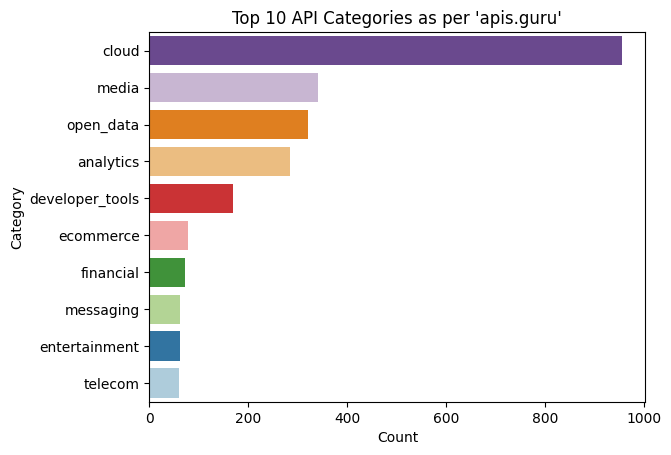

In [72]:
# How many unique categories are there?
print("Total Number of Unique API Categories (as per apis.guru): ", df['apisguru_category'].nunique())

# Plot a bar plot to visualise the top 10 API categories
top_categories = df['apisguru_category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Paired', hue=top_categories, legend=False)

# Set plot specifications
plt.title("Top 10 API Categories as per 'apis.guru'")
plt.xlabel("Count")
plt.ylabel("Category")

# Display the plot
plt.show()

Observation:  
-> Cloud APIs clearly dominate (approximately 30%), outnumbering the next category 'Media APIs' by a wide margin.

### 4.b. Visualise APIs by Providers

Total Number of Unique API Providers (as per apis.guru):  676


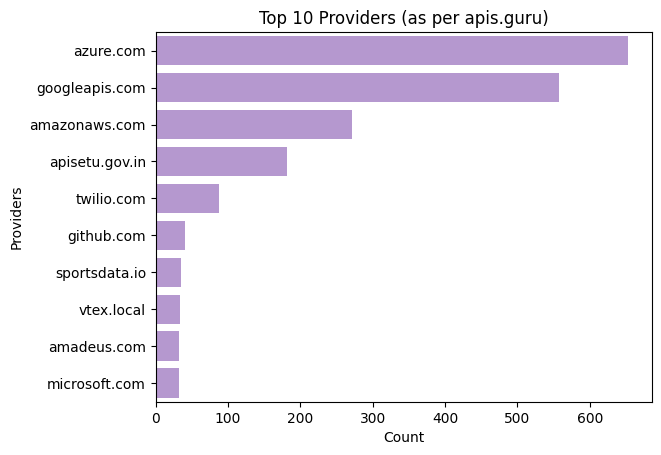

In [75]:
# How many unique providers are there?
print("Total Number of Unique API Providers (as per apis.guru): ", df['provider_name'].nunique())

# Plot a bar plot to visualise the top 10 API providers
top_providers = df['provider_name'].value_counts().head(10)
sns.barplot(x=top_providers.values, y=top_providers.index, color="#B68FD8")

# Set plot specifications
plt.title("Top 10 Providers (as per apis.guru)")
plt.xlabel("Count")
plt.ylabel("Providers")

# Display the plot
plt.show()

Observation:  
-> Azure and GoogleApis have a strong dominance, followed by AmazonAWS.  
  No wonder we saw Cloud category as the dominant one in previous plot with the top 3 providers being Cloud providers!

### 4.c. A comparison of APIs added vs APIs updated across the years for the Top 3 Providers 

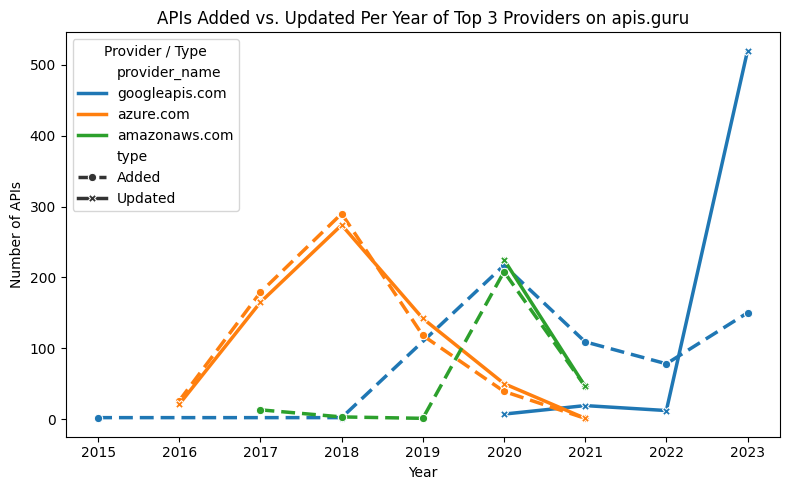

In [86]:
# Convert date fields to datetime format
df['added'] = pd.to_datetime(df['added'], errors='coerce')
df['updated'] = pd.to_datetime(df['updated'], errors='coerce')

# Extract Year from the date fields
df['year_added'] = df['added'].dt.year
df['year_updated'] = df['updated'].dt.year

# Top 3 providers
top_providers = df['provider_name'].value_counts().head(3).index

# Group the data by api provider and the year when it was added
added_df = df[df['provider_name'].isin(top_providers)].groupby(['year_added', 'provider_name'])['name'].count().reset_index()
added_df.rename(columns={'year_added': 'year', 'name': 'api_count'}, inplace=True)
added_df['type'] = 'Added'

# Group the data by api provider and the year when it was updated
updated_df = df[df['provider_name'].isin(top_providers)].groupby(['year_updated', 'provider_name'])['name'].count().reset_index()
updated_df.rename(columns={'year_updated': 'year', 'name': 'api_count'}, inplace=True)
updated_df['type'] = 'Updated'

# Combine both added and updated data
merged = pd.concat([added_df, updated_df])

# Plot using a lineplot to visualise trends over the years
plt.figure(figsize=(8, 5))
sns.lineplot(
    data=merged,
    x='year',
    y='api_count',
    hue='provider_name',
    style='type',
    dashes={'Added': (4,2), 'Updated': ''},
    linewidth=2.5,
    markers=True
)

# Set plot specifications
plt.title("APIs Added vs. Updated Per Year of Top 3 Providers on apis.guru")
plt.xlabel("Year")
plt.ylabel("Number of APIs")
plt.legend(title="Provider / Type", loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


Observations:  
->   The top provider Azure's (as can be seen from the previous plot) APIs peaked around 2018, while the Amazon and Google APIs peaked later in 2020.  
->   There has been consistent updates in Google APIs which may be indicative of maintenance and thereby high activity.  
->   Google APIs continue to see high update activity and also addition of new APIs, as compared to the other two. Looking at this trend, it may soon surpass the current top provider Azure in total APIs if the trend continues.    
->   IMPORTANT NOTE: Year_Added and Year_updated are indicative of when the APIs were added or updated on apis.guru, which may or may not be in sync with the actual API provider's activity. 